# Board games are awesome!
And we're going to find out the most awesome of qualities 

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import nltk
import json

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#py funtions
import acquire
import prepare
import explore

#filter warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

In [2]:
# acquire.get_games()

The dataset was created by webscrapping BoardGameGeek.com. This website has an api where the majority of values were pulled from. The actual rankings and ratings were not contained in the api and were therefore pulled from the browse page. 

The top 2000 games and their respective attributes were pulled and saved as a json file, which is linked in the readme. 

In [3]:
with open('data1.txt') as f:
    data1 = json.load(f)
    data1 = pd.DataFrame(data1)
    
with open('data2.txt') as f:
    data2 = json.load(f)
    data2 = pd.DataFrame(data2)

In [4]:
df = pd.concat([data1,data2]).set_index('rank')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 15 columns):
name_clean     2000 non-null object
geek_rating    2000 non-null object
avg_rating     2000 non-null object
votes          2000 non-null object
name           2000 non-null object
year           2000 non-null object
min_players    2000 non-null object
max_players    2000 non-null object
min_time       2000 non-null object
max_time       2000 non-null object
designer       2000 non-null object
category       2000 non-null object
mechanic       2000 non-null object
publisher      2000 non-null object
description    2000 non-null object
dtypes: object(15)
memory usage: 250.0+ KB


,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
1,Gloomhaven,\n\t\t\t8.587\t\t,\n\t\t\t8.86\t\t,\n\t\t\t30331\t\t,Gloomhaven,2017,1,4,60,120,Isaac Childres,"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,\n\t\t\t8.472\t\t,\n\t\t\t8.62\t\t,\n\t\t\t34208\t\t,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,\n\t\t\t8.261\t\t,\n\t\t\t8.42\t\t,\n\t\t\t46979\t\t,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,\n\t\t\t8.240\t\t,\n\t\t\t8.50\t\t,\n\t\t\t17969\t\t,Through the Ages: A New Story of Civilization,2015,2,4,120,120,Vlaada Chvátil,"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,\n\t\t\t8.191\t\t,\n\t\t\t8.62\t\t,\n\t\t\t9476\t\t,Brass: Birmingham,2018,2,4,60,120,Gavan Brown,"[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",Brass: Birmingham is an economic strategy game...


## Prepare

The geek_rating, avg_rating, and votes are regex'd to retain just their respective scores. 

In [6]:
df.geek_rating = df.geek_rating.apply(prepare.get_numbers)
df.avg_rating = df.avg_rating.apply(prepare.get_numbers)
df.votes = df.votes.apply(prepare.get_numbers)

In [7]:
df.head()

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30331,Gloomhaven,2017,1,4,60,120,Isaac Childres,"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.472,8.62,34208,Pandemic Legacy: Season 1,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46979,Terraforming Mars,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.240,8.50,17969,Through the Ages: A New Story of Civilization,2015,2,4,120,120,Vlaada Chvátil,"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.191,8.62,9476,Brass: Birmingham,2018,2,4,60,120,Gavan Brown,"[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",Brass: Birmingham is an economic strategy game...


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 1 to 2000
Data columns (total 14 columns):
name           1998 non-null object
geek_rating    1998 non-null object
avg_rating     1998 non-null object
votes          1998 non-null object
year           1998 non-null object
min_players    1998 non-null object
max_players    1998 non-null object
min_time       1998 non-null object
max_time       1998 non-null object
designer       1998 non-null object
category       1998 non-null object
mechanic       1998 non-null object
publisher      1998 non-null object
description    1998 non-null object
dtypes: object(14)
memory usage: 314.1+ KB


In [66]:
df[["geek_rating", "avg_rating", "votes", "year", "min_players",
    "max_players", "min_time", "max_time"]] = df[["geek_rating", "avg_rating", "votes", "year", "min_players",
    "max_players", "min_time", "max_time"]].apply(pd.to_numeric)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 1 to 2000
Data columns (total 14 columns):
name           1998 non-null object
geek_rating    1998 non-null float64
avg_rating     1998 non-null float64
votes          1998 non-null int64
year           1998 non-null int64
min_players    1998 non-null int64
max_players    1998 non-null int64
min_time       1998 non-null int64
max_time       1998 non-null int64
designer       1998 non-null object
category       1998 non-null object
mechanic       1998 non-null object
publisher      1998 non-null object
description    1998 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 314.1+ KB


Since the list of attributes were pulled from two different locations (the browse page and the game's individual api), compare the names from both locations to ensure they match.

In [8]:
df [df.name_clean != df.name]

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
101,War of the Ring (First Edition),7.455,7.77,9588,War of the Ring,2004,2,4,120,120,Roberto Di Meglio,"[Adventure, Fantasy, Miniatures, Novel-based, ...","[Action Points, Area Majority / Influence, Are...","[Ares Games, Asmodee, Devir, Fantasy Flight Ga...","In War of the Ring, one player takes control o..."
1404,\nCarrom\n,6.281,7.00,1471,Carrom,0,2,4,60,60,(Uncredited),[Action / Dexterity],"[Flicking, Team-Based Game]","[(Public Domain), (Unknown), ABRA, ASS Altenbu...",Carrom is most easily described as &quot;finge...


> For Carrom, the name column should be retained. The War of the Ring game will be further investigated. 

In [9]:
df [df.name_clean.str.startswith("War of the Ring")]

,name_clean,geek_rating,avg_rating,votes,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,,
12,War of the Ring (Second Edition),8.061,8.45,10998,War of the Ring (Second Edition),2012,2,4,150,180,Roberto Di Meglio,"[Adventure, Fantasy, Fighting, Miniatures, Nov...","[Action Drafting, Area Majority / Influence, A...","[Ares Games, Angry Lion Games, Devir, GaGa Gam...","In War of the Ring, one player takes control o..."
101,War of the Ring (First Edition),7.455,7.77,9588,War of the Ring,2004,2,4,120,120,Roberto Di Meglio,"[Adventure, Fantasy, Miniatures, Novel-based, ...","[Action Points, Area Majority / Influence, Are...","[Ares Games, Asmodee, Devir, Fantasy Flight Ga...","In War of the Ring, one player takes control o..."


> For 'War of the Ring (First Edition)', the name_clean should be retained

In [10]:
# replace War of the Ring "name" with "name_clean"
df.name.iloc[100] = df.name_clean.iloc[100]

# drop "name_clean" column
df.drop('name_clean', axis=1, inplace=True)

# this moves the "name" column to the beginning
df.insert(0,'name',df.pop("name"))

In [11]:
df.head()

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1,Gloomhaven,8.587,8.86,30331,2017,1,4,60,120,Isaac Childres,"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",Gloomhaven is a game of Euro-inspired tactica...
2,Pandemic Legacy: Season 1,8.472,8.62,34208,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...
3,Terraforming Mars,8.261,8.42,46979,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ..."
4,Through the Ages: A New Story of Civilization,8.240,8.50,17969,2015,2,4,120,120,Vlaada Chvátil,"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",Through the Ages: A New Story of Civilization ...
5,Brass: Birmingham,8.191,8.62,9476,2018,2,4,60,120,Gavan Brown,"[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",Brass: Birmingham is an economic strategy game...


In [12]:
print(f'There are {len(df)} games in the dataset. There are {df.name.nunique()} unique games in the datasets.')

There are 2000 games in the dataset. There are 1992 unique games in the datasets.


> These values should match and they do not. Investigate further. 

In [15]:
df [df.name.duplicated(keep=False)].sort_values("name")

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1205,Axis & Allies,6.366,6.71,5651,2004,2,5,240,240,"Larry Harris, Jr.","[Economic, Wargame, World War II]","[Area Movement, Dice Rolling, Team-Based Game]","[Avalon Hill Games, Inc., Tilsit]",Axis &amp; Allies (2004) aka Axis &amp; Allies...
1327,Axis & Allies,6.308,6.56,9846,1981,2,5,180,180,"Larry Harris, Jr.","[Economic, Wargame, World War II]","[Area Movement, Dice Rolling, Minimap Resoluti...","[Jedko Games, Milton Bradley, Nova Game Design...",Axis and Allies is the most successful of Milt...
370,Citadels,6.993,7.09,45145,2000,2,8,20,60,Bruno Faidutti,"[Bluffing, Card Game, City Building, Deduction...","[Action Drafting, Card Drafting, Set Collectio...","[Hans im Glück, (Unknown), 999 Games, Arclight...","In Citadels, players take on new roles each ro..."
480,Citadels,6.876,7.35,4869,2016,2,8,30,60,Bruno Faidutti,"[Bluffing, Card Game, City Building, Fantasy, ...","[Card Drafting, Set Collection, Turn Order: Ro...","[(Unknown), 999 Games, Asmodee, Delta Vision P...","In Citadels, players take on new roles each ro..."
128,Cosmic Encounter,7.386,7.55,25110,2008,3,5,60,120,Bill Eberle,"[Bluffing, Negotiation, Science Fiction, Space...","[Alliances, Auction/Bidding, Hand Management, ...","[Fantasy Flight Games, Arclight, Asterion Pres...",From the Manufacturer&#10;&#10;Build a galacti...
974,Cosmic Encounter,6.492,6.92,3782,1977,2,6,90,90,Bill Eberle,"[Bluffing, Negotiation, Science Fiction]","[Hand Management, Variable Player Powers]","[Eon, Alga, ASS Altenburger Spielkarten, Desca...","By request of Fantasy Flight Games, Board Game..."
1639,Cosmic Encounter,6.189,7.20,957,1991,3,6,60,60,Bill Eberle,"[Bluffing, Card Game, Science Fiction]",[Variable Player Powers],"[Hexagames (I), Mayfair Games]",Players represent alien races that are seeking...
256,Dune,7.138,7.62,5236,1979,2,6,60,180,Bill Eberle,"[Bluffing, Fighting, Negotiation, Novel-based,...","[Alliances, Area Majority / Influence, Area Mo...","[The Avalon Hill Game Co, Descartes Editeur, H...","Set thousands of years in the future, Dune the..."
1148,Dune,6.392,8.39,759,2019,2,6,120,120,Bill Eberle,[Science Fiction],"[Alliances, Area Majority / Influence, Auction...","[Gale Force Nine, LLC]",Imagine you can control the forces of a noble ...


> Many of these games have repeated names, but different release years and ratings, implying different editions. All of these duplicates will be retained. 

> 'DungeonQuest' and 'Epic Spell Wars Of Battle Wizards' contain identical information in their duplicates, except for their number of votes. When acquiring the dataset, a 5 second wait was implemented, and it appears somone voted on these two games, changing their ranking and causing them to get scraped twice. Their duplicate will be removed. 

In [28]:
df.drop(["1501","1502"], inplace=True)

In [29]:
df.description

rank
1       Gloomhaven  is a game of Euro-inspired tactica...
2       Pandemic Legacy is a co-operative campaign gam...
3       In the 2400s, mankind begins to terraform the ...
4       Through the Ages: A New Story of Civilization ...
5       Brass: Birmingham is an economic strategy game...
                              ...                        
1996    Cheating is forbidden? Not in this naughty gam...
1997    Dungeon Command: Tyranny of Goblins is a card-...
1998    London, 1901. At the world famous Portobello M...
1999    1931: Your scientific expedition discovers a n...
2000    This is an adult version of the award winning ...
Name: description, Length: 1998, dtype: object

The description will be cleaned up for natural language processing using the following functions.

`prepare.basic_clean`
- text is lowercased
- text is normalizes all special characters
- anything that is not a character, number, whitespace or apostrophe is removed
- new lines and returns are replaced with a space

`prepare.remove_stopwords`
- removes stop words found in the standard stopword list
- returns string of words

`prepare.lemmatize`
- lemmatizes applicable words

In [30]:
df.description = df.description.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [31]:
df.description

rank
1       gloomhaven game euroinspired tactical combat p...
2       pandemic legacy cooperative campaign game over...
3       2400s mankind begin terraform planet mar giant...
4       age new story civilization new edition age sto...
5       brass birmingham economic strategy game sequel...
                              ...                        
1996    cheating forbidden naughty game card ndash fac...
1997    dungeon command tyranny goblin carddriven skir...
1998    london 1901 world famous portobello market goa...
1999    1931 scientific expedition discovers new intri...
2000    adult version award winning telestrations game...
Name: description, Length: 1998, dtype: object

## Explore

Investigate the values in each of the columns

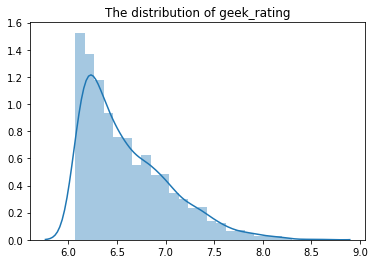

(6.066999999999999, 6.323]    703
(6.323, 6.574]                443
(6.574, 6.826]                318
(6.826, 7.077]                239
(7.077, 7.329]                139
(7.329, 7.581]                 89
(7.581, 7.832]                 37
(7.832, 8.084]                 19
(8.084, 8.335]                  9
(8.335, 8.587]                  2
Name: geek_rating, dtype: int64


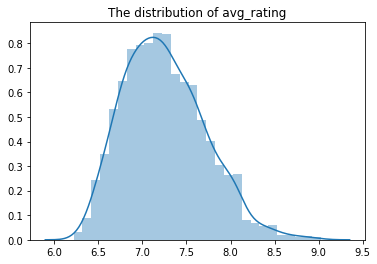

(6.215999999999999, 6.501]     60
(6.501, 6.782]                263
(6.782, 7.063]                438
(7.063, 7.344]                460
(7.344, 7.625]                362
(7.625, 7.906]                227
(7.906, 8.187]                131
(8.187, 8.468]                 35
(8.468, 8.749]                 16
(8.749, 9.03]                   6
Name: avg_rating, dtype: int64


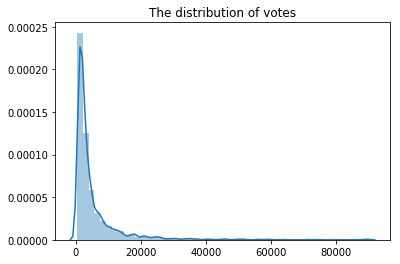

(240.468, 9283.1]     1715
(9283.1, 18236.2]      173
(18236.2, 27189.3]      61
(27189.3, 36142.4]      21
(36142.4, 45095.5]       9
(45095.5, 54048.6]       9
(54048.6, 63001.7]       4
(63001.7, 71954.8]       2
(71954.8, 80907.9]       1
(80907.9, 89861.0]       3
Name: votes, dtype: int64


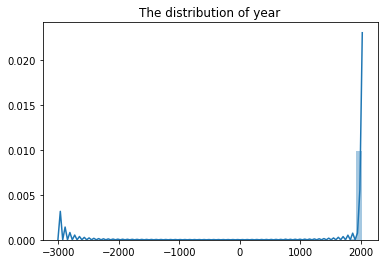

(-3005.02, -2498.1]       1
(-2498.1, -1996.2]        1
(-1996.2, -1494.3]        0
(-1494.3, -992.4]         0
(-992.4, -490.5]          0
(-490.5, 11.4]            1
(11.4, 513.3]             0
(513.3, 1015.2]           1
(1015.2, 1517.1]          1
(1517.1, 2019.0]       1993
Name: year, dtype: int64


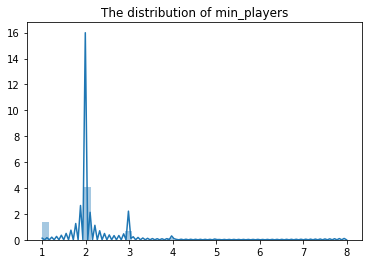

(0.992, 1.7]     431
(1.7, 2.4]      1299
(2.4, 3.1]       220
(3.1, 3.8]         0
(3.8, 4.5]        37
(4.5, 5.2]         7
(5.2, 5.9]         0
(5.9, 6.6]         2
(6.6, 7.3]         0
(7.3, 8.0]         2
Name: min_players, dtype: int64


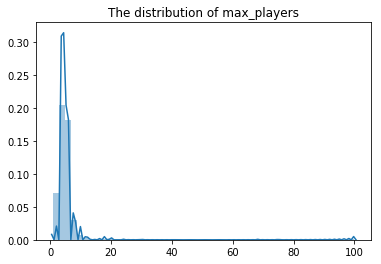

(0.9, 10.9]      1961
(10.9, 20.8]       27
(20.8, 30.7]        2
(30.7, 40.6]        0
(40.6, 50.5]        0
(50.5, 60.4]        0
(60.4, 70.3]        1
(70.3, 80.2]        1
(80.2, 90.1]        0
(90.1, 100.0]       6
Name: max_players, dtype: int64


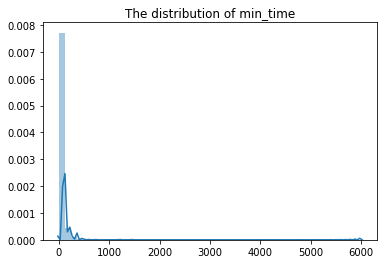

(-5.0, 600.9]       1994
(600.9, 1200.8]        2
(1200.8, 1800.7]       1
(1800.7, 2400.6]       0
(2400.6, 3000.5]       0
(3000.5, 3600.4]       0
(3600.4, 4200.3]       0
(4200.3, 4800.2]       0
(4800.2, 5400.1]       0
(5400.1, 6000.0]       1
Name: min_time, dtype: int64


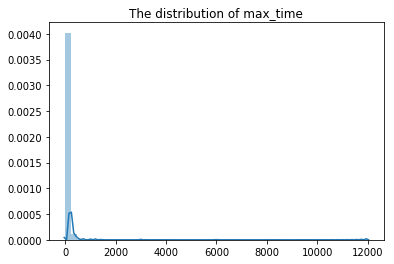

(-9.998999999999999, 1201.8]    1994
(1201.8, 2401.6]                   1
(2401.6, 3601.4]                   1
(3601.4, 4801.2]                   0
(4801.2, 6001.0]                   1
(6001.0, 7200.8]                   0
(7200.8, 8400.6]                   0
(8400.6, 9600.4]                   0
(9600.4, 10800.2]                  0
(10800.2, 12000.0]                 1
Name: max_time, dtype: int64


In [68]:
for col in df.select_dtypes(np.number).columns:
    sns.distplot(df[col])
    plt.title(f"The distribution of {col}")
    plt.xlabel("")
    plt.show()
    print(df[col].value_counts(bins=10, sort=False))

> To further investigate:
    - board games with years in the negative
    - what board games have max players over 20 people? sounds like it wouldn't fit on a board
    - what board game has a minimum time of 6000 minutes?! 

#### Board games with negative years

In [69]:
df [df.year < 1400]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
150,Go,7.342,7.64,13707,-2200,2,2,30,180,(Uncredited),[Abstract Strategy],[Enclosure],"[(Public Domain), (Self-Published), (Unknown),...",appearance two player taking turn laying stone...
1216,Backgammon,6.360,6.53,10639,-3000,2,2,30,30,(Uncredited),"[Abstract Strategy, Dice]","[Betting and Bluffing, Dice Rolling, Roll / Sp...","[(Public Domain), (Unknown), 3M, Alga, Ariel P...",backgammon classic abstract strategy game dati...
1226,Xiangqi,6.354,7.14,1740,762,2,2,60,60,(Uncredited),[Abstract Strategy],[Grid Movement],"[(Public Domain), (Unknown), Carlton Books, Ca...",xiangqi one played board game world translated...
1404,Carrom,6.281,7.00,1471,0,2,4,60,60,(Uncredited),[Action / Dexterity],"[Flicking, Team-Based Game]","[(Public Domain), (Unknown), ABRA, ASS Altenbu...",carrom easily described quotfinger poolquot 29...


I thought these were typos. 
- Go definitely originated in BC time. Documents state origin times between 2000 and 5000 years ago
- Research states that backgammon is about 5000 years old
- Xiangpi also appears to be in the correct range.
- It is unknown when Carrom originated. It became popular in the 19th century, but is believed to have been around much longer. 

> These dates appear appropriate. However, as outliers, they do skew the data, as I'm interested in analyzing the success of current games. Games older than 1950 will be removed. 

In [80]:
df = df [df.year > 1950]

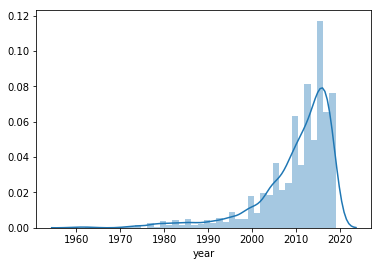

In [81]:
sns.distplot(df.year)
plt.show()

> It is seen that the popularity of board games have definitely spiked in the past twenty years. 

#### Board games with a high number of max players

In [90]:
len(df [df.max_players > 10])

37

> There are 37 games that have greater than 20 players. As I define a board game as something that can be played sitting at a table, I consider these high player games to be an outlier and will also remove them. 

In [93]:
df = df [df.max_players <= 10]

#### Board games with high minimum times 

In [56]:
df [df.min_time > 600]

,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description
rank,,,,,,,,,,,,,,
1121,The Civil War,6.410,7.67,1092,1983,2,2,1200,1200,Eric Lee Smith,"['American Civil War', 'Civil War', 'Post-Napo...","['Dice Rolling', 'Hexagon Grid', 'Simulation']",['Victory Games (I)'],sprawling rendition american civil war try fit...
1155,Europe Engulfed,6.389,7.50,1246,2003,2,3,720,720,Jesse Evans,"['Wargame', 'World War II']","['Action Points', 'Area Movement', 'Dice Rolli...",['GMT Games'],gmt website1010more thirteen year design devel...
1162,Empires in Arms,6.388,7.57,1179,1983,2,7,6000,12000,Greg Pinder,"['Economic', 'Napoleonic', 'Negotiation', 'Pol...","['Area Movement', 'Dice Rolling', 'Secret Unit...","['Australian Design Group', 'The Avalon Hill G...",back box avalon hill edition1010empires arm ga...
1661,Rise and Decline of the Third Reich,6.181,6.85,1746,1974,2,6,1440,1440,Don Greenwood,"['Negotiation', 'Political', 'Wargame', 'World...","['Dice Rolling', 'Hexagon Grid', 'Simulation']","['The Avalon Hill Game Co', 'Hobby Japan']",rise decline third reich realistic simulation ...


> What is 'Empire in Arms' and why would anyone play such a long game? Anything longer than 12 hours is defintely a marathon game and will be excluded from this analysis. 

In [95]:
df = df [df.min_time < 600]

Since games (rows) have been removed, reset index. 

In [103]:
df = df.reset_index()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 15 columns):
rank           1936 non-null object
name           1936 non-null object
geek_rating    1936 non-null float64
avg_rating     1936 non-null float64
votes          1936 non-null int64
year           1936 non-null int64
min_players    1936 non-null int64
max_players    1936 non-null int64
min_time       1936 non-null int64
max_time       1936 non-null int64
designer       1936 non-null object
category       1936 non-null object
mechanic       1936 non-null object
publisher      1936 non-null object
description    1936 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 227.0+ KB


After prepping the data, there is still 1936 games to manipulate. 

#### Feature Engineering

How long is each readme? 

In [115]:
explore.description_length(df)

,rank,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,desc_length
0,1,Gloomhaven,8.587,8.86,30331,2017,1,4,60,120,Isaac Childres,"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",gloomhaven game euroinspired tactical combat p...,136
1,2,Pandemic Legacy: Season 1,8.472,8.62,34208,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",pandemic legacy cooperative campaign game over...,176
2,3,Terraforming Mars,8.261,8.42,46979,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...",2400s mankind begin terraform planet mar giant...,280
3,4,Through the Ages: A New Story of Civilization,8.240,8.50,17969,2015,2,4,120,120,Vlaada Chvátil,"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",age new story civilization new edition age sto...,144
4,5,Brass: Birmingham,8.191,8.62,9476,2018,2,4,60,120,Gavan Brown,"[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",brass birmingham economic strategy game sequel...,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,1996,Cheating Moth,6.072,6.47,2224,2011,3,5,30,30,Emely Brand,"[Action / Dexterity, Card Game]",[Hand Management],"[Drei Magier Spiele, 999 Games, ADC Blackfire ...",cheating forbidden naughty game card ndash fac...,268
1932,1997,Dungeon Command: Tyranny of Goblins,6.072,7.41,643,2012,2,4,90,90,Chris Dupuis,"[Card Game, Fantasy, Miniatures, Wargame]","[Action Points, Area Movement, Campaign / Batt...",[Wizards of the Coast],dungeon command tyranny goblin carddriven skir...,147
1933,1998,Portobello Market,6.071,6.40,2388,2007,2,4,35,35,Thomas Odenhoven,[Abstract Strategy],"[Area Majority / Influence, Area Movement]","[Lautapelit.fi, Playroom Entertainment, Schmid...",london 1901 world famous portobello market goa...,43
1934,1999,Mountains of Madness,6.071,6.58,1770,2017,3,5,60,90,Rob Daviau,"[Horror, Novel-based, Real-time]","[Communication Limits, Cooperative Game, Dice ...","[Angry Lion Games, Bureau De Juegos, Devir, Go...",1931 scientific expedition discovers new intri...,52


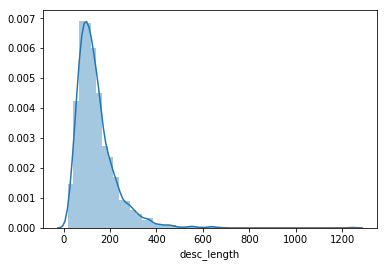

In [116]:
sns.distplot(df.desc_length)
plt.show()

#### Correlations

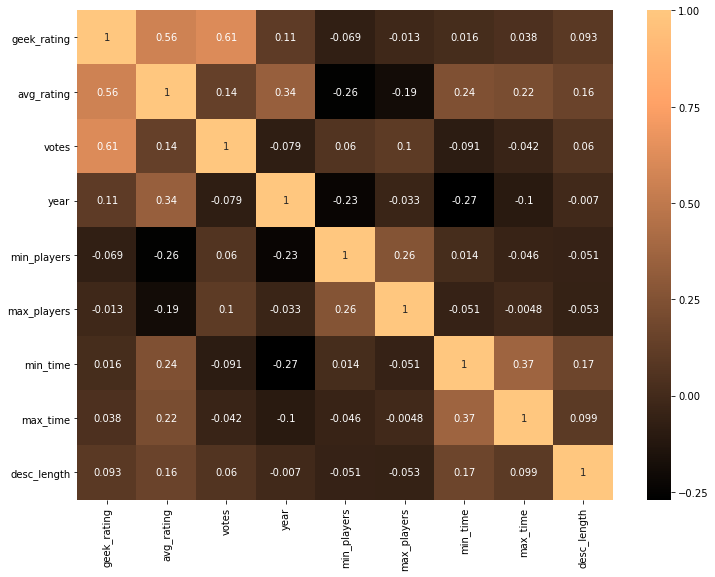

In [122]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap="copper")
plt.show()

In [125]:
# sns.pairplot(df)
# plt.show()

> There is some correlation with the geek_rating and avg_rating and votes. This makes sense as the geek_rating is a weighted value based on the those two features. 

> There is also some correlation between min_time and max_time, which also makes sense, as games times typically fall into a relatively small range. 

In [126]:
df

,rank,name,geek_rating,avg_rating,votes,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,desc_length
0,1,Gloomhaven,8.587,8.86,30331,2017,1,4,60,120,Isaac Childres,"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Asmodee, Feuerland S...",gloomhaven game euroinspired tactical combat p...,136
1,2,Pandemic Legacy: Season 1,8.472,8.62,34208,2015,2,4,60,60,Rob Daviau,"[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",pandemic legacy cooperative campaign game over...,176
2,3,Terraforming Mars,8.261,8.42,46979,2016,1,5,120,120,Jacob Fryxelius,"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...",2400s mankind begin terraform planet mar giant...,280
3,4,Through the Ages: A New Story of Civilization,8.240,8.50,17969,2015,2,4,120,120,Vlaada Chvátil,"[Card Game, Civilization, Economic]","[Action Points, Auction/Bidding, Auction: Dutc...","[Czech Games Edition, Cranio Creations, Devir,...",age new story civilization new edition age sto...,144
4,5,Brass: Birmingham,8.191,8.62,9476,2018,2,4,60,120,Gavan Brown,"[Economic, Industry / Manufacturing, Transport...","[Hand Management, Income, Loans, Market, Netwo...","[Roxley, BoardM Factory, Conclave Editora, Cro...",brass birmingham economic strategy game sequel...,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,1996,Cheating Moth,6.072,6.47,2224,2011,3,5,30,30,Emely Brand,"[Action / Dexterity, Card Game]",[Hand Management],"[Drei Magier Spiele, 999 Games, ADC Blackfire ...",cheating forbidden naughty game card ndash fac...,268
1932,1997,Dungeon Command: Tyranny of Goblins,6.072,7.41,643,2012,2,4,90,90,Chris Dupuis,"[Card Game, Fantasy, Miniatures, Wargame]","[Action Points, Area Movement, Campaign / Batt...",[Wizards of the Coast],dungeon command tyranny goblin carddriven skir...,147
1933,1998,Portobello Market,6.071,6.40,2388,2007,2,4,35,35,Thomas Odenhoven,[Abstract Strategy],"[Area Majority / Influence, Area Movement]","[Lautapelit.fi, Playroom Entertainment, Schmid...",london 1901 world famous portobello market goa...,43
1934,1999,Mountains of Madness,6.071,6.58,1770,2017,3,5,60,90,Rob Daviau,"[Horror, Novel-based, Real-time]","[Communication Limits, Cooperative Game, Dice ...","[Angry Lion Games, Bureau De Juegos, Devir, Go...",1931 scientific expedition discovers new intri...,52


#### Most popular designers

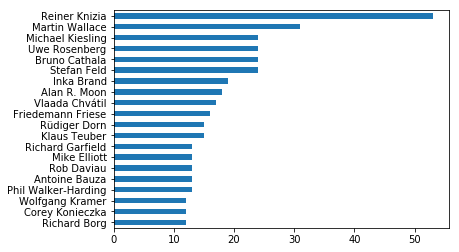

In [195]:
df.designer.value_counts().head(20).sort_values().plot.barh()
plt.show()

#### Categories

In [196]:
categories = [cat for game in df.category for cat in game]
cat_count = pd.Series(categories).value_counts()

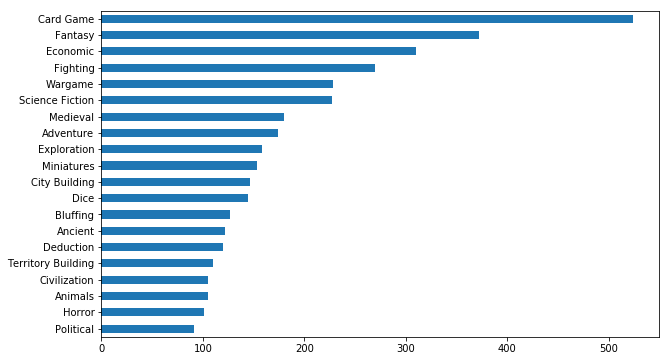

In [197]:
plt.figure(figsize=(10,6))
cat_count.head(20).sort_values().plot.barh()
plt.show()

#### Mechanics

In [202]:
mechanics = [mech for game in df.mechanic for mech in game]
mech_count = pd.Series(mechanics).value_counts()

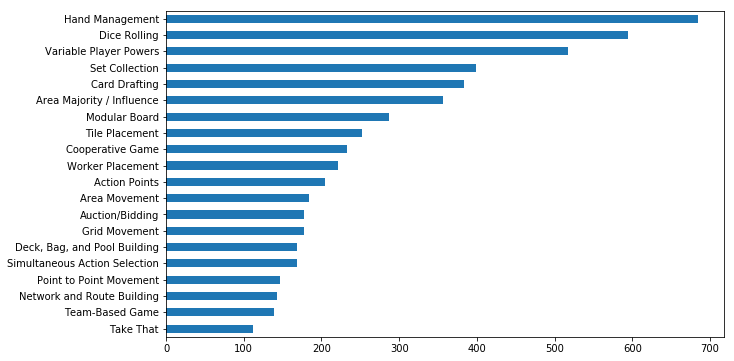

In [203]:
plt.figure(figsize=(10,6))
mech_count.head(20).sort_values().plot.barh()
plt.show()

#### Description

In [205]:
all_words = ' '.join(df.description)

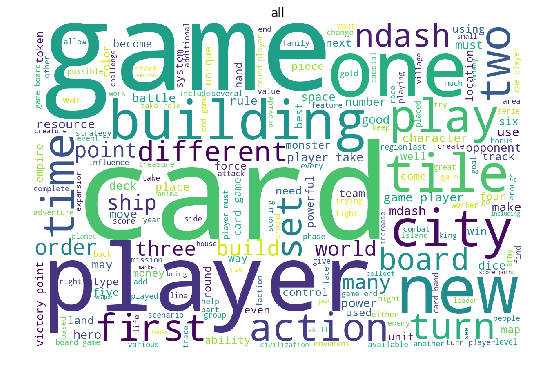

In [206]:
explore.one_word_one_cloud(all_words, "all")

In [207]:
all_words_bigram = pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(100)

In [208]:
from wordcloud import WordCloud

def two_word_one_cloud(words, title):
    data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    cloud= WordCloud(background_color='white', width=1000, height=800).generate_from_frequencies(data)

    plt.figure(figsize=(10, 8))
    plt.imshow(cloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

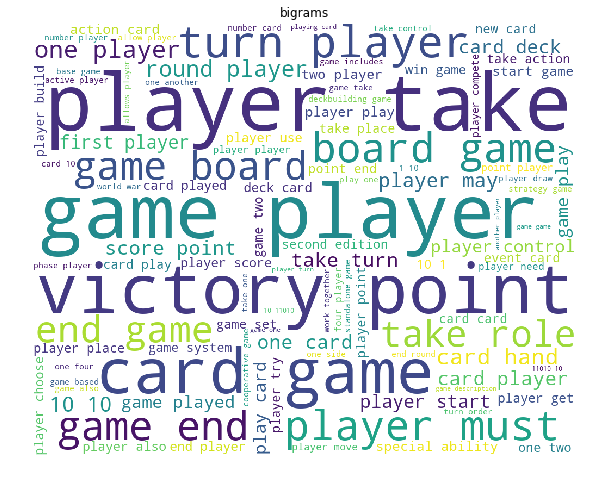

In [211]:
two_word_one_cloud(all_words_bigram, "bigrams")

In [213]:
all_words_trigram = pd.Series(nltk.ngrams(all_words.split(), 3)).value_counts().head(30)

In [218]:
def three_word_one_cloud(words, title):
    data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in words.to_dict().items()}
    cloud = WordCloud(background_color='white', width=1000, height=800).generate_from_frequencies(data)

    plt.figure(figsize=(10, 8))
    plt.imshow(cloud)
    plt.title(title)
    plt.axis("off")
    plt.show()

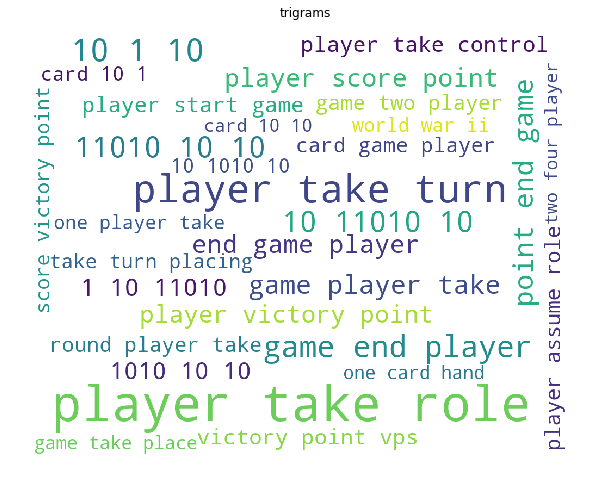

In [220]:
three_word_one_cloud(all_words_trigram, "trigrams")

> What are all those 10s???? 

In [221]:
from sklearn.model_selection import train_test_split

## Split

In [241]:
train, test = train_test_split(df, random_state=123)

In [242]:
train.shape

(1452, 16)

In [243]:
test.shape

(484, 16)

In [272]:
X_train = train.drop("rank", axis=1)
y_train = train[["rank"]].astype(np.number)
X_test = test.drop("rank", axis=1)
y_test = test[["rank"]].astype(np.number)

In [273]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE

def select_kbest_freg(X_train, y_train, k):
    f_selector = SelectKBest(f_regression, k=k).fit(X_train, y_train)
    f_support = f_selector.get_support()
    f_feature = X_train.loc[:,f_support].columns.tolist()
    return f_feature

In [274]:
X_train_reg = X_train[["votes", "year", "min_players", "max_players","min_time","max_time"]]

In [275]:
X_train_reg.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 275 to 1534
Data columns (total 6 columns):
votes          1452 non-null int64
year           1452 non-null int64
min_players    1452 non-null int64
max_players    1452 non-null int64
min_time       1452 non-null int64
max_time       1452 non-null int64
dtypes: int64(6)
memory usage: 79.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 275 to 1534
Data columns (total 1 columns):
rank    1452 non-null float64
dtypes: float64(1)
memory usage: 22.7 KB


In [278]:
select_kbest_freg(X_train_reg, y_train, 5)

['votes', 'year', 'min_players', 'max_players', 'max_time']

In [282]:
X_train_reg_optimal = X_train[select_kbest_freg(X_train_reg, y_train, 5)]

In [283]:
X_train_reg_optimal

,votes,year,min_players,max_players,max_time
275,11037,2010,2,4,60
1732,978,2013,2,2,30
861,2200,2018,1,6,30
653,1645,2010,2,2,30
379,3973,2016,2,2,30
...,...,...,...,...,...
1122,2719,2014,2,4,60
1346,3135,2005,2,4,90
1406,886,1992,2,6,360
1389,772,2011,1,1,180


## Model

In [286]:
from sklearn.linear_model import LinearRegression

def linear_model(X_train, y_train):
    lm=LinearRegression()
    lm.fit(X_train,y_train)
    lm_predictions=lm.predict(X_train)
    return lm_predictions

In [292]:
y_train["predict"] = linear_model(X_train_reg_optimal, y_train)

In [308]:
y_train.rename(columns={"rank":"actual"}, inplace=True)

In [309]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(actual, model):
    MSE = mean_squared_error(actual, model)
    SSE = MSE*len(actual)
    RMSE = sqrt(MSE)
    r2 = r2_score(actual, model)
    return MSE, SSE, RMSE, r2 

In [312]:
evaluate(y_train.actual, y_train.predict)

(236757.21147709308,
 343771471.06473917,
 486.5770355011559,
 0.29543609966720374)